In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv("advertising.csv")
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [20]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [21]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


In [22]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


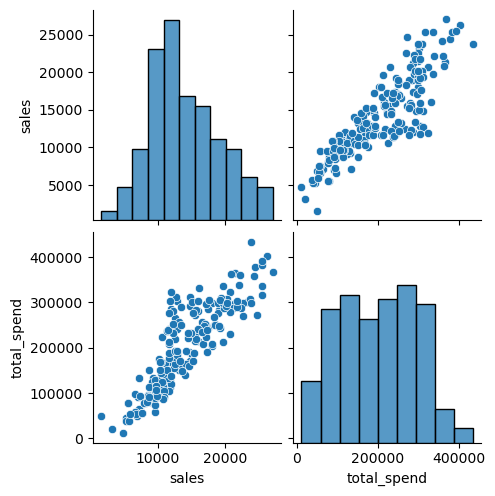

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [13]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

In [23]:
x=df.drop(columns='sales')
y=df['sales']

In [16]:
x

,total_spend
0,337100
1,128900
2,132400
3,251300
4,250000
...,...
195,55700
196,107200
197,192700
198,391800


In [17]:
y

0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

In [21]:
type(y)

pandas.core.series.Series

In [22]:
type(x)

pandas.core.frame.DataFrame

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
x_train

,total_spend
169,301300
97,227900
31,168900
12,124800
35,303300
...,...
106,65700
14,283000
92,310200
179,193200


In [31]:
x_test.shape

(60, 1)

In [14]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
model.intercept_

4199.10650086872

In [27]:
model.coef_

array([0.04895385])

In [28]:
train_prediction=model.predict(x_train)
test_prediction=model.predict(x_test)

In [32]:
x_test.head()

,total_spend
95,247800
15,296000
30,364400
158,93800
128,272500


In [34]:
test_prediction

array([16329.87002336, 18689.44549464, 22037.88869456,  8790.97743876,
       17539.03006777, 12168.79294745, 18292.91932623,  8115.41433702,
       15894.18077659, 15414.43306666,  7053.11583647,  8683.27897327,
       19996.51323496,  6387.34350432, 12433.14372639, 14636.06688422,
        7958.76202358, 15708.15615437, 10470.09442351, 17705.47315081,
       20647.59941272, 14890.62689357,  8614.74358613, 21807.80560918,
        8076.25125866,  7963.65740837, 18410.40856132, 12227.53756499,
       10313.44211007,  6044.66656866, 15145.18690292,  9486.12207968,
       19291.57782445, 11542.18369366, 20432.20248173, 17798.48546192,
        9280.51591828, 21935.08561386, 10920.46982467,  6637.00812888,
       11385.53138021, 13632.51300121,  9334.36515103,  8761.60512999,
       16045.93770524,  6925.83583179, 10435.82672995, 13515.02376612,
       11282.72829952, 10063.77748551, 12007.2452492 , 13417.11607022,
       10690.3867393 ,  8962.31590659,  8702.86051245, 12345.02680007,
      

In [35]:
from sklearn.metrics import r2_score
print('r2 for test data:',r2_score(y_test,test_prediction))
print('r2 for train data:',r2_score(y_train,train_prediction))

r2 for test data: 0.7650262463310723
r2 for train data: 0.7404192834391545


**or**

In [38]:
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

0.7650262463310723
0.7404192834391545


In [40]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)

cv_score=scores.mean()
print('cross validation scores:',cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation scores: 0.7433783178555419


**linearity of errors**

In [41]:
test_res=y_test-test_prediction

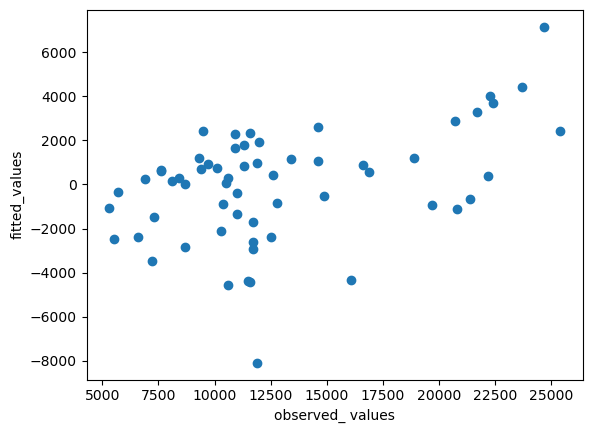

In [48]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_ values")
plt.ylabel("fitted_values")
plt.show()

**narmolity of errors**

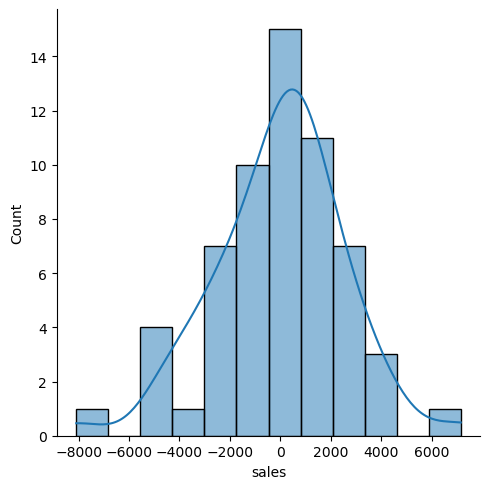

In [44]:
sns.displot(test_res,kde=True)
plt.show()

**eqal variance of errors**

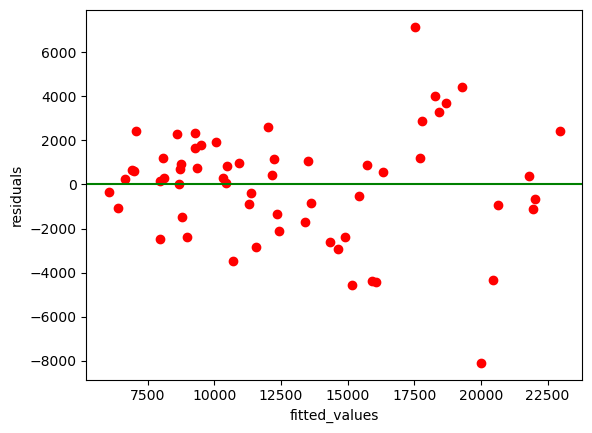

In [53]:
plt.scatter(test_prediction,test_res,color="red")
plt.axhline(y=0,color="green")
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

In [54]:
import statsmodels.formula.api as smf
model2=smf.ols('y~x',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           5.06e-62
Time:                        17:01:24   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
model.predict([[321400]])


D:\Datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19932.87323262])

In [56]:
from joblib import dump

In [57]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

In [58]:
from joblib import load

In [59]:
loaded_model=load('sales_model.joblib')

In [60]:
loaded_model.predict([[200000]])

D:\Datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv("advertising.csv")
df

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900
...,...,...,...,...
195,38200,3700,13800,7600
196,94200,4900,8100,9700
197,177000,9300,6400,12800
198,283600,42000,66200,25500


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [82]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']
df

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000
...,...,...,...,...,...
195,38200,3700,13800,7600,55700
196,94200,4900,8100,9700,107200
197,177000,9300,6400,12800,192700
198,283600,42000,66200,25500,391800


In [83]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)
df

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800


In [84]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


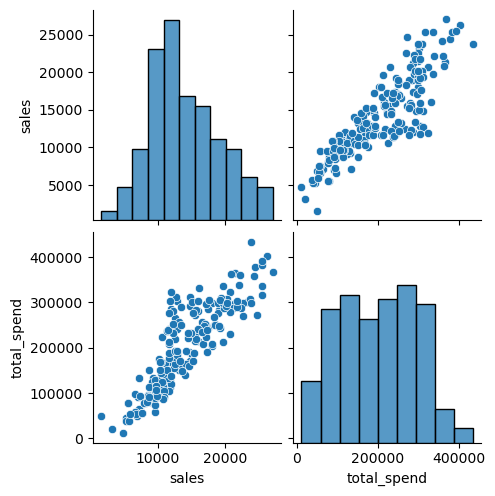

In [86]:
sns.pairplot(df)
plt.show()

In [87]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


In [88]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

In [92]:
x=df.drop(columns='sales')
y=df['sales']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [98]:
model.intercept_

4199.10650086872

In [99]:
model.coef_

array([0.04895385])

In [100]:
train_predictions=model.predict(x_train)
test_predictions=model.predict(x_test)

In [103]:
model.score(x_train,y_train)

0.7404192834391545

In [102]:
model.score(x_test,y_test)

0.7650262463310723

In [104]:
from sklearn.metrics import r2_score

In [105]:
print('r2 for train data:',r2_score(y_train,train_predictions))
print('r2 for test data:',r2_score(y_test,test_predictions))

r2 for train data: 0.7404192834391545
r2 for test data: 0.7650262463310723


In [106]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)
cv_score=scores.mean()
print('cross validation score:',cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation score: 0.7433783178555419


**linearity of errors**

In [107]:
test_res=y_test-test_predictions

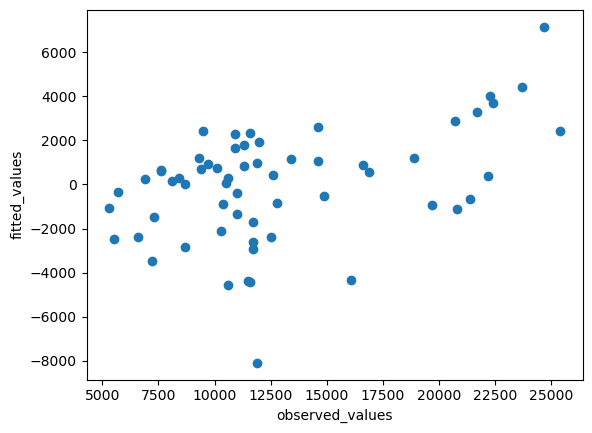

In [108]:
plt.scatter(y_test,test_res)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

**normality of errors**

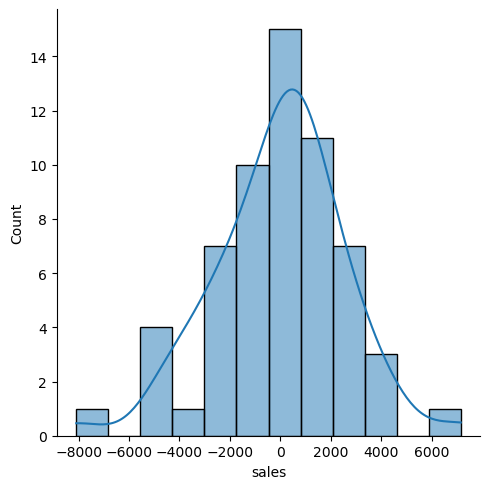

In [110]:
sns.displot(test_res,kde=True)
plt.show()

**equal variance of errors**

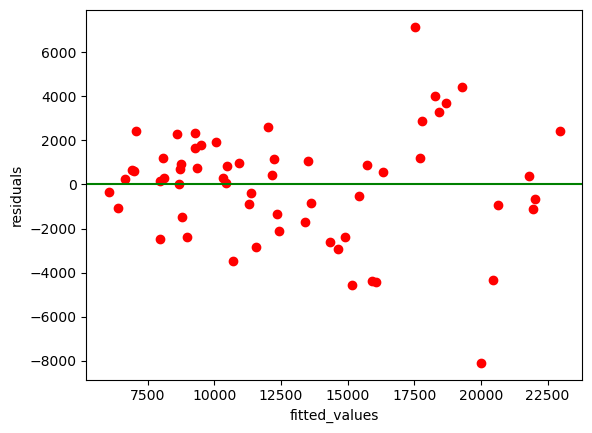

In [112]:
plt.scatter(test_predictions,test_res,color='red')
plt.axhline(y=0,color='green')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

**variable significance**

In [117]:
import statsmodels.formula.api as smf
model2=smf.ols('y~x',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 26 Jan 2023   Prob (F-statistic):           5.06e-62
Time:                        19:38:23   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
model.predict([[321400]])

D:\Datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19932.87323262])

In [119]:
from joblib import dump

In [120]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

In [121]:
from joblib import load

In [122]:
loaded_model=load('sales_model.joblib')

In [123]:
loaded_model.predict([[200000]])

D:\Datascience\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])